In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('banzhang.csv', na_values = '?')
df_clean = df.drop(['encounter_id','patient_nbr'],axis=1)
df_clean = df_clean.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [3]:
X = df_clean.drop(['readmitted'], axis=1)
y = df_clean['readmitted']

In [4]:
numeric_features_raw = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features_raw = X.select_dtypes(include=['object']).columns

In [5]:
numeric_features_raw

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')

In [6]:
categorical_features_raw

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'diag_1_new',
       'diag_2_new', 'diag_3_new'],
      dtype='object')

In [7]:
categorical_features = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
        'race', 'gender', 'age', 'max_glu_serum',
        'diag_1_new','diag_2_new', 'diag_3_new',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']

In [8]:
numeric_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'] 

In [9]:
X_1 = pd.concat([X[categorical_features], X[numeric_features]], axis=1)

In [10]:
transformed_X = pd.get_dummies(data=X_1, columns=categorical_features)

In [11]:
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.20,random_state=4444)

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200)

In [13]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test) 

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.6349497730865331

In [15]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(20)

,importance
num_lab_procedures,0.077740
num_medications,0.070478
time_in_hospital,0.051895
number_inpatient,0.048083
number_diagnoses,0.038040
num_procedures,0.036054
number_outpatient,0.018148
number_emergency,0.015057
diag_3_new_Circulatory,0.014111
gender_Female,0.013823


In [16]:
y_pred_proba = rf.predict_proba(X_train) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E7696E710>]],
      dtype=object)

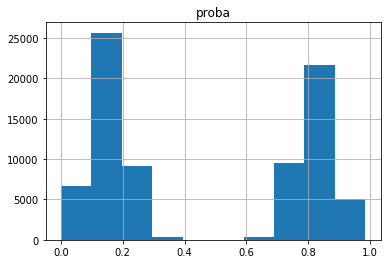

In [17]:
proba = pd.DataFrame(y_pred_proba[:,1])
proba.columns = ['proba']
proba.hist()

In [18]:
#X_train = pd.concat([X_train, proba], axis=1)

In [19]:
#X_train.head()

In [20]:
#We set the thershold
proba['risk'] = np.where(proba['proba'] > 0.6, 3, 2)
proba['risk'] = np.where(proba['proba'] < 0.05, 1, proba['risk'])

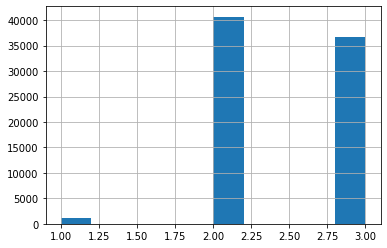

In [21]:
proba['risk'].hist()

In [22]:
proba.head()

,proba,risk
0,0.205,2
1,0.865,3
2,0.095,2
3,0.810,3
4,0.145,2


In [23]:
proba = proba.drop('proba', axis=1)
proba.head()

,risk
0,2
1,3
2,2
3,3
4,2


In [24]:
y_train_risk = proba
y_train_risk['risk'].value_counts()

2    40672
3    36590
1     1180
Name: risk, dtype: int64

In [25]:
rf1 = RandomForestClassifier(n_estimators = 200)

In [26]:
rf1.fit(X_train,y_train_risk)
y_pred1 = rf1.predict(X_test) 

C:\Users\junho\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [27]:
y_pred1 = pd.DataFrame(y_pred1,columns=['risk'])

In [28]:
y_test = pd.DataFrame(y_test)
y_test.reset_index(inplace = True, drop = True)

In [29]:
risk_analysis = pd.concat([pd.DataFrame(y_pred1), pd.DataFrame(y_test)], axis=1)

In [30]:
high_risk_test = risk_analysis[risk_analysis['risk'] == 3]
med_risk_test = risk_analysis[risk_analysis['risk'] == 2]
low_risk_test = risk_analysis[risk_analysis['risk'] == 1]

In [31]:
high_risk_test['readmitted'].value_counts()

1    5029
0    3045
Name: readmitted, dtype: int64

In [32]:
5039/len(high_risk_test)

0.624102055982165

### 62.6% in the high_risk_test will be readmitted

In [33]:
med_risk_test['readmitted'].value_counts()

0    7287
1    4092
Name: readmitted, dtype: int64

In [34]:
4082/len(med_risk_test)

0.35873099569382194

### 36% in the med_risk_test will be readmitted

In [35]:
low_risk_test['readmitted'].value_counts()

0    158
Name: readmitted, dtype: int64

### 0% in the low_risk_test data!

In [36]:
y_test['readmitted'].value_counts()

0    10490
1     9121
Name: readmitted, dtype: int64

## Round 2 of RF to Cross validate

In [41]:
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.20,random_state=2)

In [42]:
X_train['gender_Unknown/Invalid']

91020    0
62024    0
79588    0
38099    0
43408    0
        ..
31019    0
44566    0
95816    0
72173    0
89256    0
Name: gender_Unknown/Invalid, Length: 78442, dtype: uint8

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200)

In [44]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test) 

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.6350517566671766

In [46]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(20)

,importance
num_lab_procedures,0.077401
num_medications,0.070665
time_in_hospital,0.051846
number_inpatient,0.047899
number_diagnoses,0.037544
num_procedures,0.035770
number_outpatient,0.018202
number_emergency,0.015282
diag_3_new_Circulatory,0.014096
gender_Female,0.013562


In [47]:
y_pred_proba = rf.predict_proba(X_train) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002180101A288>]],
      dtype=object)

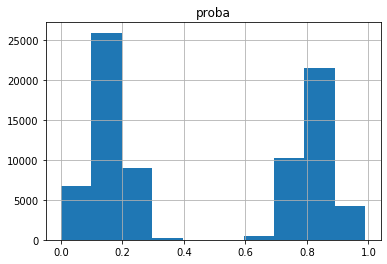

In [48]:
proba = pd.DataFrame(y_pred_proba[:,1])
proba.columns = ['proba']
proba.hist()

In [49]:
#X_train = pd.concat([X_train, proba], axis=1)

In [50]:
#X_train.head()

In [51]:
#We set the thershold
proba['risk'] = np.where(proba['proba'] > 0.6, 3, 2)
proba['risk'] = np.where(proba['proba'] < 0.05, 1, proba['risk'])

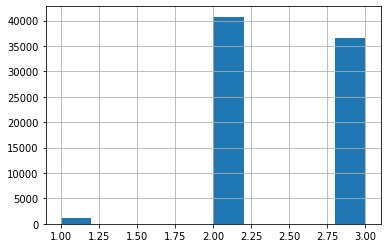

In [52]:
proba['risk'].hist()

In [53]:
proba.head()

,proba,risk
0,0.165,2
1,0.740,3
2,0.125,2
3,0.110,2
4,0.745,3


In [54]:
proba = proba.drop('proba', axis=1)
proba.head()

,risk
0,2
1,3
2,2
3,2
4,3


In [55]:
y_train_risk = proba
y_train_risk['risk'].value_counts()

2    40767
3    36521
1     1154
Name: risk, dtype: int64

In [56]:
rf1 = RandomForestClassifier(n_estimators = 200)

In [57]:
rf1.fit(X_train,y_train_risk)
y_pred1 = rf1.predict(X_test) 

C:\Users\Junhong\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [58]:
y_pred1 = pd.DataFrame(y_pred1,columns=['risk'])

In [59]:
y_test = pd.DataFrame(y_test)
y_test.reset_index(inplace = True, drop = True)

In [60]:
risk_analysis = pd.concat([pd.DataFrame(y_pred1), pd.DataFrame(y_test)], axis=1)

In [61]:
high_risk_test = risk_analysis[risk_analysis['risk'] == 3]
med_risk_test = risk_analysis[risk_analysis['risk'] == 2]
low_risk_test = risk_analysis[risk_analysis['risk'] == 1]

In [62]:
high_risk_test['readmitted'].value_counts()

1    4981
0    2949
Name: readmitted, dtype: int64

In [63]:
4937/len(high_risk_test)

0.6225725094577553

### 62.6% in the high_risk_test will be readmitted

In [64]:
med_risk_test['readmitted'].value_counts()

0    7294
1    4211
Name: readmitted, dtype: int64

In [65]:
4255/len(med_risk_test)

0.3698392003476749

### 37% in the med_risk_test will be readmitted

In [66]:
low_risk_test['readmitted'].value_counts()

0    175
1      1
Name: readmitted, dtype: int64

In [67]:
1/169

0.005917159763313609

### 0.5% in the low_risk_test data

In [68]:
y_test['readmitted'].value_counts()

0    10418
1     9193
Name: readmitted, dtype: int64

## RF Round 3

In [364]:
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.30,random_state=1234)

In [365]:
X_train['gender_Unknown/Invalid']

27632    0
12082    0
60136    0
32319    0
61141    0
        ..
89460    0
60620    0
34086    0
58067    0
92975    0
Name: gender_Unknown/Invalid, Length: 68637, dtype: uint8

In [366]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200)

In [367]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test) 

In [368]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.6340766929562143

In [369]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(20)

,importance
num_lab_procedures,0.076892
num_medications,0.070001
time_in_hospital,0.052210
number_inpatient,0.048590
number_diagnoses,0.037379
num_procedures,0.035617
number_outpatient,0.018130
number_emergency,0.015045
diag_3_new_Circulatory,0.014069
diag_2_new_Circulatory,0.013920


In [370]:
y_pred_proba_rf = rf.predict_proba(X_train) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002180576CF08>]],
      dtype=object)

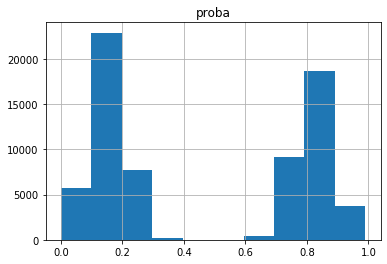

In [371]:
proba = pd.DataFrame(y_pred_proba_rf[:,1])
proba.columns = ['proba']
proba.hist()

In [77]:
#X_train = pd.concat([X_train, proba], axis=1)

In [78]:
#X_train.head()

In [79]:
#We set the thershold
proba['risk'] = np.where(proba['proba'] > 0.6, 3, 2)
proba['risk'] = np.where(proba['proba'] < 0.05, 1, proba['risk'])

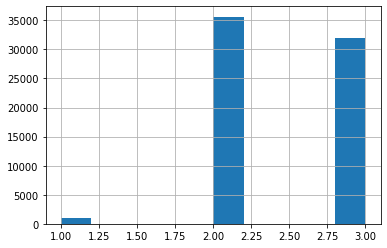

In [80]:
proba['risk'].hist()

In [81]:
proba.head()

,proba,risk
0,0.790,3
1,0.115,2
2,0.835,3
3,0.735,3
4,0.740,3


In [82]:
proba = proba.drop('proba', axis=1)
proba.head()

,risk
0,3
1,2
2,3
3,3
4,3


In [83]:
y_train_risk = proba
y_train_risk['risk'].value_counts()

2    35619
3    31990
1     1028
Name: risk, dtype: int64

In [84]:
rf1 = RandomForestClassifier(n_estimators = 200)

In [85]:
rf1.fit(X_train,y_train_risk)
y_pred1 = rf1.predict(X_test) 

C:\Users\Junhong\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [86]:
y_pred1 = pd.DataFrame(y_pred1,columns=['risk'])

In [87]:
y_test = pd.DataFrame(y_test)
y_test.reset_index(inplace = True, drop = True)

In [88]:
risk_analysis = pd.concat([pd.DataFrame(y_pred1), pd.DataFrame(y_test)], axis=1)

In [89]:
high_risk_test = risk_analysis[risk_analysis['risk'] == 3]
med_risk_test = risk_analysis[risk_analysis['risk'] == 2]
low_risk_test = risk_analysis[risk_analysis['risk'] == 1]

In [90]:
high_risk_test['readmitted'].value_counts()

1    7384
0    4408
Name: readmitted, dtype: int64

In [91]:
7339/len(high_risk_test)

0.6223710990502035

### 62.6% in the high_risk_test will be readmitted

In [92]:
med_risk_test['readmitted'].value_counts()

0    11019
1     6338
Name: readmitted, dtype: int64

In [93]:
6383/len(med_risk_test)

0.367747882698623

### 37% in the med_risk_test will be readmitted

In [94]:
low_risk_test['readmitted'].value_counts()

0    266
1      1
Name: readmitted, dtype: int64

In [95]:
1/213

0.004694835680751174

### 0.4% in the low_risk_test data

In [96]:
y_test['readmitted'].value_counts()

0    15693
1    13723
Name: readmitted, dtype: int64

# Ridge Regression 

In [354]:
from sklearn.linear_model import RidgeCV

In [355]:
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.30,random_state=1234)

In [397]:
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1,3,5,10,15,20],normalize = True).fit(X_train, y_train)

In [398]:
clf.fit(X_train,y_train)
y_pred_proba_logit = clf.predict(X_train) 

In [399]:
clf.alpha_

0.01

In [400]:
clf = Ridge(alpha=0.01,normalize = True)

In [401]:
clf.fit(X_train,y_train)
y_pred_proba_logit = clf.predict(X_train) 

In [402]:
threshold = 0.5

y_pred = (y_pred_proba_logit >= threshold).astype('int')

In [403]:
#training set accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_train)

0.6342060404737969

In [404]:
#Coefficients
feature_coefficients = pd.DataFrame(clf.coef_,
                                   index = X_train.columns,
                                    columns=['coefficients']).sort_values('coefficients', ascending=False)
feature_coefficients

,coefficients
tolazamide_Up,0.490184
miglitol_Up,0.466199
chlorpropamide_Up,0.277338
miglitol_Down,0.250666
discharge_disposition_id_12,0.248172
...,...
discharge_disposition_id_14,-0.415223
admission_source_id_13,-0.424470
glyburide-metformin_Down,-0.462902
discharge_disposition_id_20,-0.480353


In [405]:
#Obtain all the non-zero coefficient features
zero_coef_features = list(feature_coefficients[feature_coefficients['coefficients']==0].index)
non_zero_coef_features = final_list= list(set(list(feature_coefficients.index)).difference(set(zero_coef_features)))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021805D397C8>]],
      dtype=object)

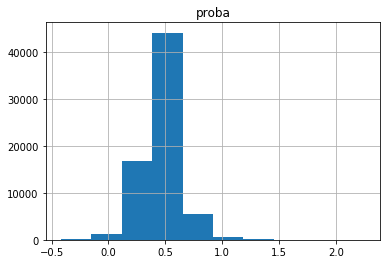

In [406]:
proba = pd.DataFrame(y_pred_proba)
proba.columns = ['proba']
proba.hist()

In [407]:
proba.shape

(68637, 1)

In [408]:
#X_train = pd.concat([X_train, proba], axis=1)

In [409]:
#X_train.head()

In [410]:
#We set the thershold
proba['risk'] = np.where(proba['proba'] > 0.5, 3, 2)
proba['risk'] = np.where(proba['proba'] < 0.2, 1, proba['risk'])

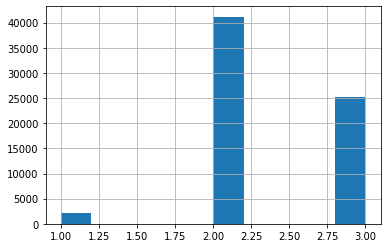

In [411]:
proba['risk'].hist()

In [412]:
proba.head()

,proba,risk
0,0.522249,3
1,0.370528,2
2,0.555603,3
3,0.339654,2
4,0.445597,2


In [413]:
proba = proba.drop('proba', axis=1)
proba.head()

,risk
0,3
1,2
2,3
3,2
4,2


In [414]:
y_train_risk = proba
y_train_risk['risk'].value_counts()

2    41171
3    25259
1     2207
Name: risk, dtype: int64

### Now we want to build a logistic regression using the new y_train with multiple risk levels

In [437]:
#from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(multi_class='multinomial',solver='lbfgs')

In [438]:
X_train.shape

(68637, 195)

In [439]:
y_train_risk.shape

(68637, 1)

In [441]:
clf1.fit(X_train[non_zero_coef_features],y_train_risk)
y_pred1 = clf1.predict(X_test[non_zero_coef_features]) 

C:\Users\Junhong\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Junhong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [445]:
y_pred1

array([3, 3, 3, ..., 2, 2, 3])

In [446]:
y_pred1 = pd.DataFrame(y_pred1,columns=['risk'])

In [447]:
y_test = pd.DataFrame(y_test)
y_test.reset_index(inplace = True, drop = True)

In [448]:
risk_analysis = pd.concat([pd.DataFrame(y_pred1), pd.DataFrame(y_test)], axis=1)

In [449]:
high_risk_test = risk_analysis[risk_analysis['risk'] == 3]
med_risk_test = risk_analysis[risk_analysis['risk'] == 2]
low_risk_test = risk_analysis[risk_analysis['risk'] == 1]

In [450]:
high_risk_test['readmitted'].value_counts()

1    6439
0    3979
Name: readmitted, dtype: int64

In [452]:
6439/len(high_risk_test)

0.6180648876943751

### 61.8% in the high_risk_test will be readmitted

In [453]:
med_risk_test['readmitted'].value_counts()

0    11425
1     7280
Name: readmitted, dtype: int64

In [454]:
7280/len(med_risk_test)

0.3892007484629778

### 39% in the med_risk_test will be readmitted

In [455]:
low_risk_test['readmitted'].value_counts()

0    289
1      4
Name: readmitted, dtype: int64

In [456]:
4/len(low_risk_test)

0.013651877133105802

### 1% in the low_risk_test data

## We use the classification labels from RF CV1 to do analysis based on demographics

In [40]:
high_risk_test.head()

,risk,readmitted
3,3,1
4,3,1
7,3,1
10,3,1
11,3,1


In [41]:
med_risk_test.head()

,risk,readmitted
0,2,0
1,2,0
2,2,1
5,2,1
6,2,0


In [42]:
low_risk_test.head()

,risk,readmitted
130,1,0
177,1,0
295,1,0
389,1,0
478,1,0


In [43]:
risk_cat = pd.concat([high_risk_test, med_risk_test,low_risk_test], axis=0)

In [46]:
risk_cat.head()

,risk,readmitted
3,3,1
4,3,1
7,3,1
10,3,1
11,3,1


In [72]:
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(X_1,y,test_size=0.20,random_state=4444)

In [74]:
X_test_1 = X_test_1.reset_index()
X_test_1.head()

,index,admission_type_id,discharge_disposition_id,admission_source_id,race,gender,age,max_glu_serum,diag_1_new,diag_2_new,...,change,diabetesMed,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,89953,2,1,4,Caucasian,Male,[60-70),None,Circulatory,Circulatory,...,Ch,Yes,2,13,0,11,0,0,0,9
1,53331,3,1,1,Caucasian,Male,[50-60),None,Mental disorders,Mental disorders,...,Ch,Yes,12,53,0,12,0,0,0,5
2,8548,5,3,17,Caucasian,Male,[80-90),Norm,Circulatory,Circulatory,...,No,Yes,7,22,1,13,2,0,0,5
3,6666,1,6,7,AfricanAmerican,Male,[70-80),None,Circulatory,Diabetes,...,No,Yes,6,52,3,6,0,1,1,6
4,40152,1,6,7,Caucasian,Male,[70-80),None,Circulatory,Genitourinary,...,Ch,Yes,4,59,0,19,3,1,1,9


In [76]:
BIG_X = pd.concat([risk_cat, X_test_1], axis=1)

In [77]:
BIG_X.shape

(19611, 47)

In [78]:
BIG_X['risk'].value_counts()

2    11379
3     8074
1      158
Name: risk, dtype: int64

In [79]:
low_risk_people = BIG_X[BIG_X['risk']==1]
med_risk_people = BIG_X[BIG_X['risk']==2]
high_risk_people = BIG_X[BIG_X['risk']==3]

In [80]:
low_risk_people['race'].value_counts()

Caucasian          116
AfricanAmerican     38
Other                2
Hispanic             1
Asian                1
Name: race, dtype: int64

In [81]:
med_risk_people['race'].value_counts()

Caucasian          8550
AfricanAmerican    2275
Hispanic            261
Other               204
Asian                89
Name: race, dtype: int64

In [82]:
high_risk_people['race'].value_counts()

Caucasian          6373
AfricanAmerican    1425
Hispanic            144
Other               105
Asian                27
Name: race, dtype: int64

In [83]:
low_risk_people['age'].value_counts()

[80-90)     45
[70-80)     35
[60-70)     22
[50-60)     19
[90-100)    16
[30-40)     11
[40-50)      5
[20-30)      5
Name: age, dtype: int64

In [84]:
med_risk_people['age'].value_counts()

[70-80)     2766
[60-70)     2632
[50-60)     2161
[80-90)     1623
[40-50)     1135
[30-40)      475
[90-100)     345
[20-30)      173
[10-20)       59
[0-10)        10
Name: age, dtype: int64

In [85]:
high_risk_people['age'].value_counts()

[70-80)     2231
[60-70)     1734
[80-90)     1580
[50-60)     1264
[40-50)      680
[30-40)      257
[90-100)     182
[20-30)      113
[10-20)       32
[0-10)         1
Name: age, dtype: int64

In [86]:
low_risk_people['gender'].value_counts()

Female    92
Male      66
Name: gender, dtype: int64

In [87]:
med_risk_people['gender'].value_counts()

Female    5882
Male      5497
Name: gender, dtype: int64

In [88]:
high_risk_people['gender'].value_counts()

Female    4545
Male      3529
Name: gender, dtype: int64